# Importing Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [26]:
# loading the CSV data to a Pandas data Frame
gold_data = pd.read_csv("E:\TEJU\Dataset\gld_price_data.csv")

In [27]:
gold_data.head() # Printing the first five rows of the data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [28]:
gold_data.tail() # Printing the last five rows of the data

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [29]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [30]:
# Knowing some information
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [31]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [32]:
# Getting the stastical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Coorelation:
    1.Positive Correlation
    2. Negative Coorelation

In [34]:
correlation = gold_data.corr(numeric_only=True)


<Axes: >

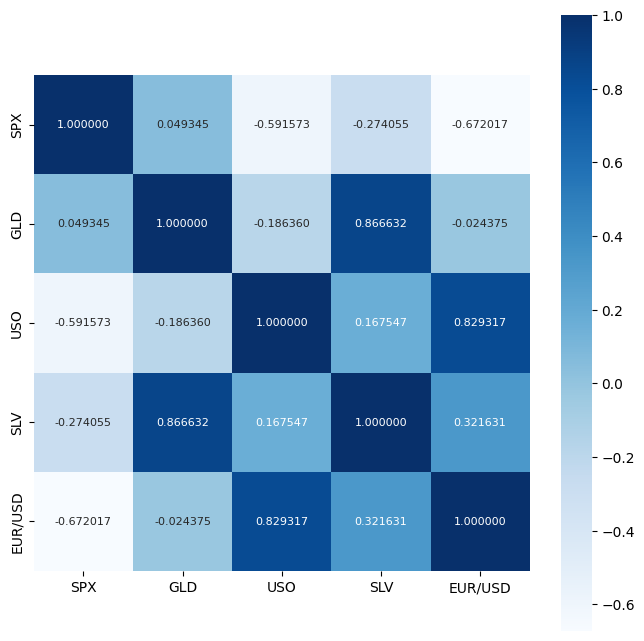

In [37]:
# Constructing a heatm,ap to understand the coorelation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [38]:
# Coorelation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


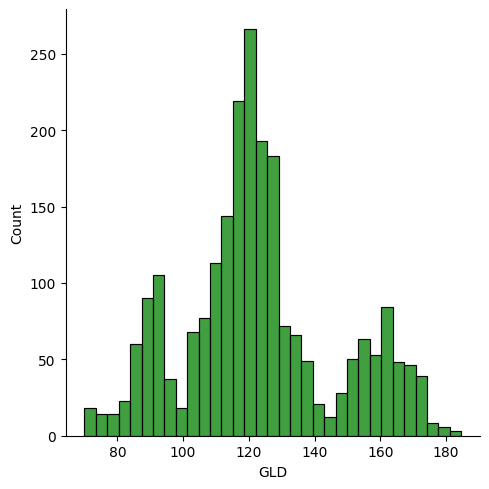

In [39]:
# Checking the Distribution
sns.displot(gold_data['GLD'], color='Green')

# Splitting the Data

In [40]:
x = gold_data.drop(['Date','GLD'], axis=1)
y = gold_data['GLD']

In [41]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

# Splitting the data into Training Data and testing Data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 2)

Model training:
RandomForest Regressor

In [45]:
regressor = RandomForestRegressor(n_estimators = 100)

In [47]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

# Model Evaluation

In [48]:
# Prediction on the test data
test_data_prediction = regressor.predict(x_test)

In [50]:
print(test_data_prediction)

[168.53629931  82.0038999  115.98160051 127.56530089 120.58520162
 154.55539793 150.33309822 126.16410016 117.51559881 126.02870048
 116.76770075 171.78020125 141.55589935 167.66629865 115.09540015
 117.70530035 138.6884024  170.25470097 159.49460321 158.16469959
 155.25880042 125.0935002  175.62229978 156.72270361 125.23580063
  93.71740004  77.3399001  120.53380004 119.11839946 167.49489987
  88.09250068 125.12639963  91.01310076 117.5872003  121.15719932
 136.60250143 115.39750128 115.14080075 145.85920045 107.20080112
 104.13040258  87.09809782 126.56650019 117.61859991 153.54599933
 119.70250021 108.4973996  108.01379815  93.25910084 127.22949727
  74.75190028 113.63099935 121.51000019 111.09389903 118.75139872
 120.73129972 159.80749914 167.65410137 147.00089642  85.72599861
  94.4089002   86.85729879  90.44770002 119.13680078 126.49800038
 127.48249988 168.29079966 122.24539927 117.40139895  98.61080075
 168.52980063 142.96039877 131.95110251 121.34260238 121.21409923
 119.64850

In [59]:
# Checking the Metrices
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R Squared Error :", error_score)
mae = metrics.mean_absolute_error(y_test,test_data_prediction)
print("Mean Absolute Error :", mae)
mse = metrics.mean_squared_error(y_test,test_data_prediction)
print("Mean Squared Error :", mse)

R Squared Error : 0.9897393269980695
Mean Absolute Error : 1.3219919810043643
Mean Squared Error : 5.411925287200043


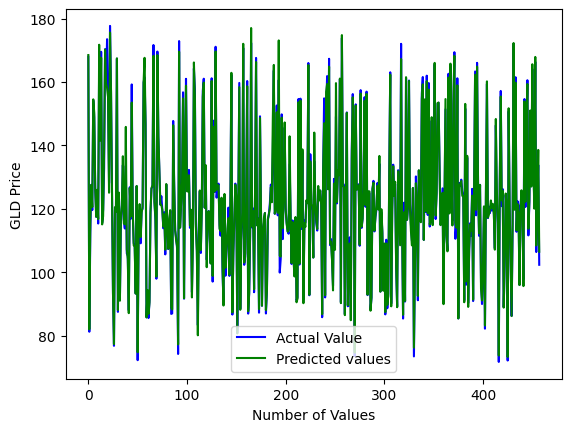

In [60]:
# Compare the Actual Values and Predicted values in a plot
y_test = list(y_test)
plt.plot(y_test, color="blue", label="Actual Value")
plt.plot(test_data_prediction, color='green', label='Predicted values')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()